<a href="https://colab.research.google.com/github/hodanourian/Forecasting-and-Predictive-Analytics/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Trends Time Series Data



> We will be analyzing the **U.S. Tax Season**, which provides a fixed administrative timeline creating mandatory time lags for our time series analysis. This is the dataset we will use for the remainder of this exercise.


**Case Study: Tax Refund Status, W2 form and TurboTax login**

*   *Region: United States*
*    *Time range: Past 5 years*







In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.tsa.stattools import ccf
import statsmodels.api as sm


#Cleaning the dataset
#The initial steps of the dataset cleaning process were executed directly in the CSV file.
# 1. the first two metadata rows were deleted, and the regional suffixes were removed from the column headers.
# 2. The column names have been shortened to facilitate coding and improve readability {Tax	form	login}
# 3. In "Tax day deadline" column , there were several data entries "<1" that we replaced with zero.
# "<1" : It means that the search volume is so low that its index value falls below 1 on the 0 to 100 scale.

#uploud file
from google.colab import files
uploaded = files.upload()

# 2. Read the CSV file and set the first column as the index
X = pd.read_csv('multiTimeline (2).csv', index_col = 0, parse_dates = True)


X.head()



Saving multiTimeline (2).csv to multiTimeline (2).csv


,Tax,form,login,deadline
Week,,,,
2020-11-29,2,3,5,0
2020-12-06,2,4,5,0
2020-12-13,2,4,5,0
2020-12-20,2,3,6,0
2020-12-27,2,5,11,0


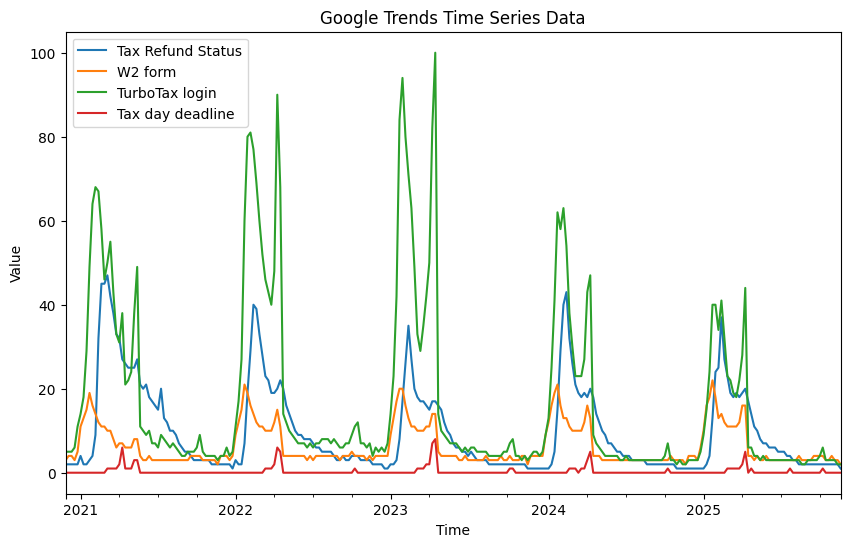

In [ ]:
# Define time series

# Tax= β0 + β1(form) + β2(login)
Tax_ts = pd.Series(X.values[:,0], index = X.index)  #Dependent Variable
form_ts = pd.Series(X.values[:,1], index = X.index)  #Predictor Variable
login_ts = pd.Series(X.values[:,2], index = X.index) #Predictor Variable
deadline_ts = pd.Series(X.values[:,3], index = X.index) #Predictor Variable

plt.figure(figsize=(10, 6))

Tax_ts.plot()
form_ts.plot()
login_ts.plot()
deadline_ts.plot()

plt.title('Google Trends Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Tax Refund Status', 'W2 form', 'TurboTax login', 'Tax day deadline' ], loc = 'upper left')

plt.show()


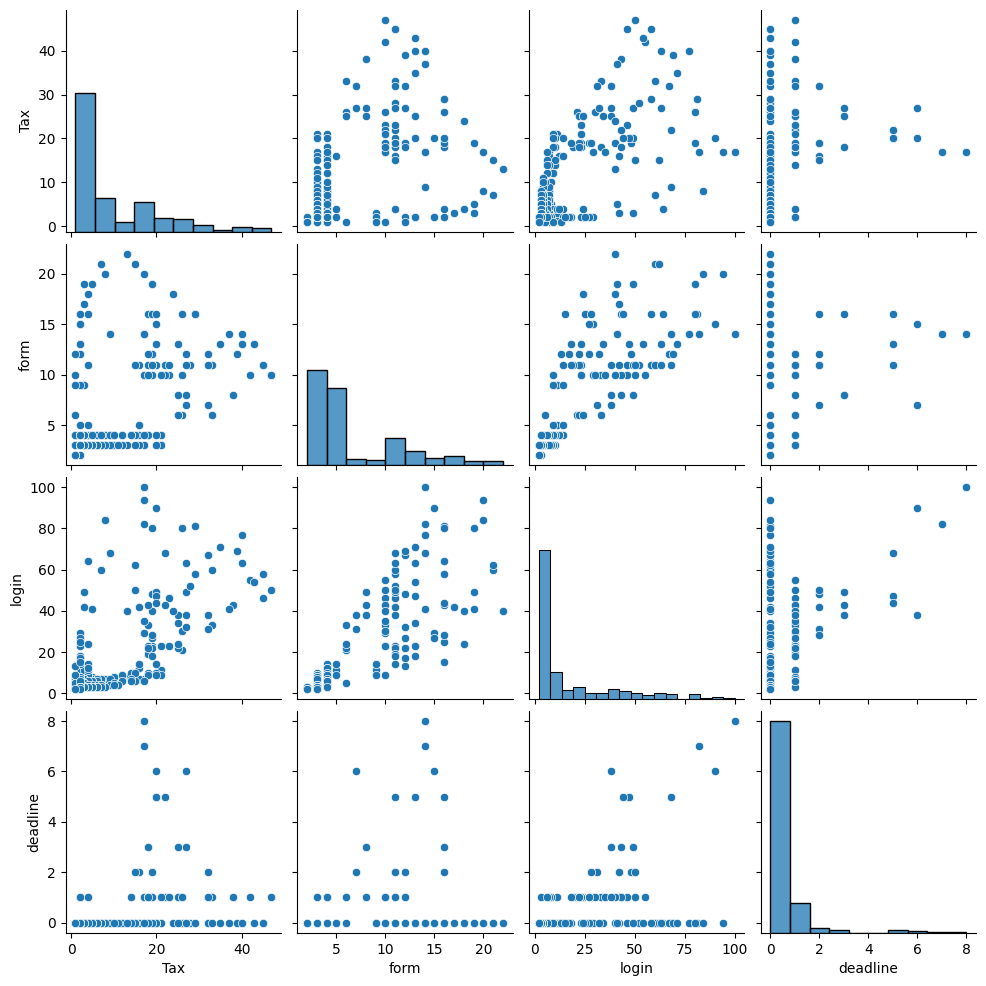

In [ ]:

sns.pairplot(X)

plt.show()




1.  The scatter plot for the **Dependent Variable (Tax Refund Status)** against the Predictor **Variable (W2 form)** shows a generally positive correlation. However, the relationship is clearly **non-linear** and characterized by high dispersion, exhibiting a pronounced triangular or fan shape rather than a tight linear trend.


2.   The scatter plot for the **Dependent Variable (Tax Refund Status)** against the Predictor **Variable (TurboTax login)** shows a positive correlation. The data maintains the triangular, **non-linear pattern, but the points appear slightly** more concentrated than with W2form, suggesting a tighter relationship, particularly at lower search volumes.

3.  The scatter plot confirms a generally positive correlation between the **Tax day deadlin** variable and Tax Refund Status. However, the relationship is **clearly non-linear** and exhibits a triangular/fan shape.





In [ ]:
# Regression modeling

X.columns = ['Tax', 'form', 'login', 'deadline' ]

model = ols(formula = 'Tax ~ form + login + deadline', data = X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    Tax   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     90.10
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           7.18e-40
Time:                        18:48:06   Log-Likelihood:                -891.23
No. Observations:                 261   AIC:                             1790.
Df Residuals:                     257   BIC:                             1805.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2789      0.814      7.711      0.0

Since **P>|t|:0.267**  is significantly greater than 0.05, this indicates that the predictor variable : **Tax day deadlin** associated with this P-value is statistically **insignificant**.

Equation of a line:

**TaxRefundStatus= 6.1872-0.6864(W2form)+0.4671(TurboTaxlogin)**


**P>|t|** for other variables = 0.000 (which means very small) ⇒ other coefficients are **highly significant**.

In practice, this means the effects of form and login on your outcome are real and reliable, not due to chance.




In [ ]:
# Regression modeling
#column_to_drop = X.columns[3]
#X.drop(columns=[column_to_drop], axis=1, inplace=True)


X.columns = ['Tax', 'form', 'login' ]

model = ols(formula = 'Tax ~ form + login ', data = X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    Tax   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     134.4
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           1.01e-40
Time:                        18:50:54   Log-Likelihood:                -891.86
No. Observations:                 261   AIC:                             1790.
Df Residuals:                     258   BIC:                             1800.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1958      0.811      7.638      0.0

**R-squared:0.51** Your model explains **over half** of the fluctuations in the search volume for Tax Refund Status, but there is still room for improvement, and the lag = 0 term has likely not performed as strongly as expected.

Best Lag 4


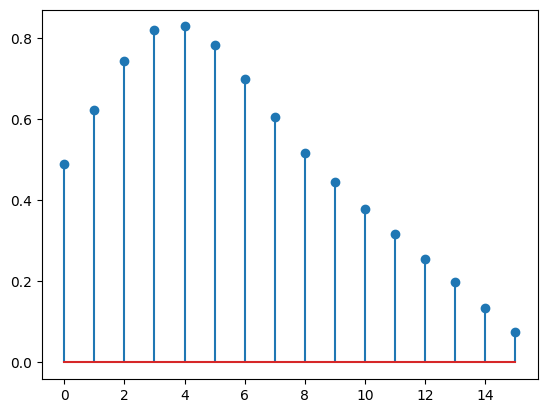

In [ ]:

max_lag = 15
corr = ccf(Tax_ts,form_ts)

corr = corr[:max_lag+1]
best_lag = np.argmax(corr)
print("Best Lag", best_lag)


plt.stem(range(max_lag+1), corr)
plt.show()

Best Lag 2


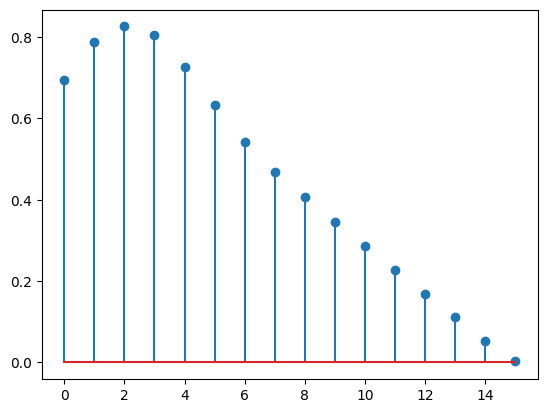

In [ ]:

max_lag = 15
corr = ccf(Tax_ts,login_ts)

corr = corr[:max_lag+1]
best_lag = np.argmax(corr)
print("Best Lag", best_lag)

plt.stem(range(max_lag+1), corr)
plt.show()

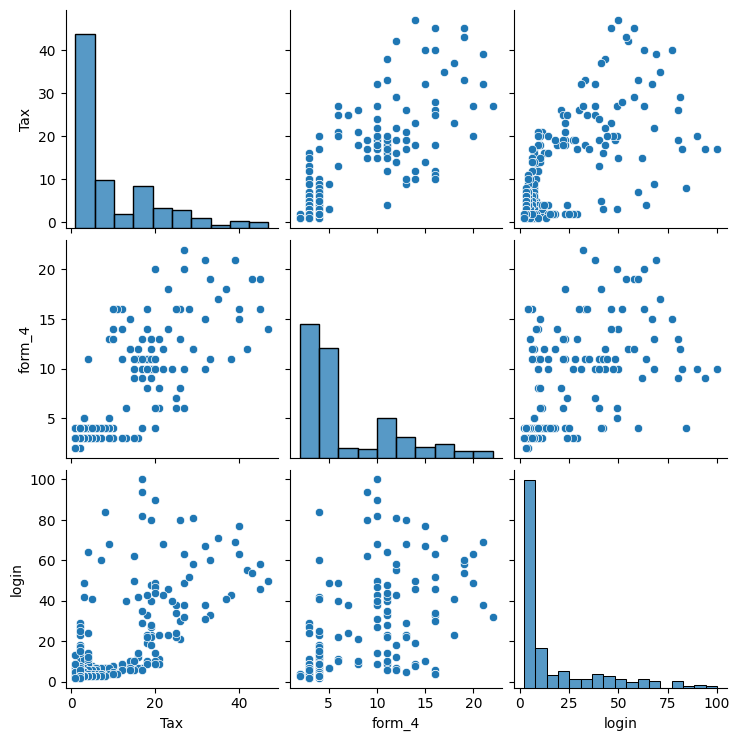

In [ ]:
# Scatter plots
form_4_ts = form_ts.shift(4)
X2 = pd.DataFrame({'Tax': Tax_ts, 'form_4': form_4_ts, 'login': login_ts,}).dropna()

sns.pairplot(X2)

plt.show()

In [ ]:
# Model 2

model2 = ols(formula = ' Tax ~ form_4 + login ', data = X2).fit()

print(model2.summary())





                            OLS Regression Results                            
Dep. Variable:                    Tax   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     332.7
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           1.13e-71
Time:                        18:52:50   Log-Likelihood:                -805.49
No. Observations:                 257   AIC:                             1617.
Df Residuals:                     254   BIC:                             1628.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5101      0.584     -2.586      0.0

R-squared: 0.724
That's a significant improvement! It has increased by more than 20%

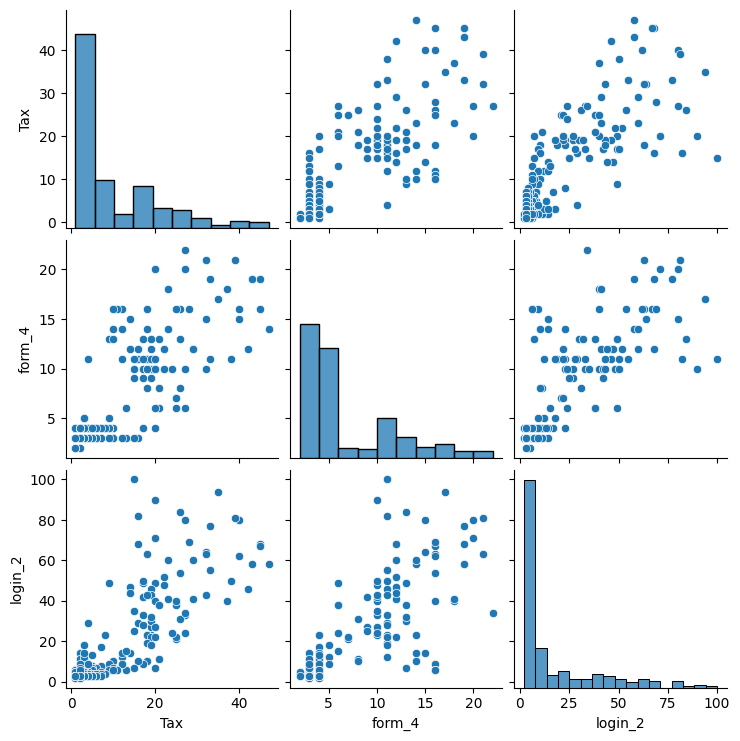

In [ ]:
 #Scatter plots

login_2_ts = login_ts.shift(2)
X3 = pd.DataFrame({'Tax': Tax_ts, 'form_4': form_4_ts, 'login_2': login_2_ts}).dropna()

sns.pairplot(X3)

plt.show()

In [ ]:
# Model 3

model3 = ols(formula = ' Tax ~ form_4 + login_2 ', data = X3).fit()

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    Tax   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     373.2
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           2.46e-76
Time:                        18:53:54   Log-Likelihood:                -794.63
No. Observations:                 257   AIC:                             1595.
Df Residuals:                     254   BIC:                             1606.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3140      0.582     -0.539      0.5

R-squared: 0.746 The improvement exceeded three percent.

In [ ]:
# Model 3

model4 = ols(formula = ' Tax ~ form_4 + login_2 + form2_2 ', data = X4).fit()

print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    Tax   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     249.1
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           3.37e-75
Time:                        17:58:26   Log-Likelihood:                -794.16
No. Observations:                 257   AIC:                             1596.
Df Residuals:                     253   BIC:                             1611.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6523      0.678     -0.962      0.3

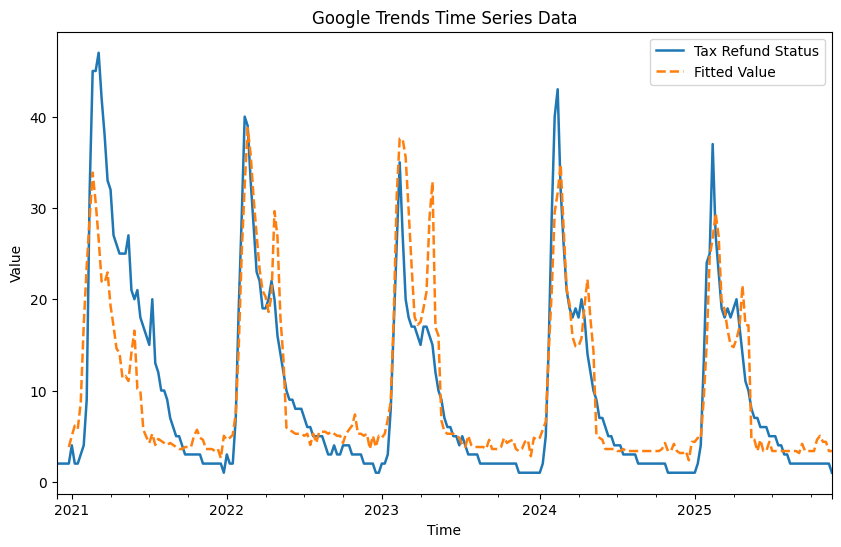

In [ ]:
Tax2_ts = pd.Series(model3.fittedvalues.values, index=X3.index)

plt.figure(figsize = (10, 6))

Tax_ts.plot(linewidth = 1.8)
Tax2_ts.plot(linestyle = '--', linewidth = 1.8)

plt.title('Google Trends Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Tax Refund Status', 'Fitted Value'], loc = 'upper right')

plt.show()

Overall, the model **follows the main pattern** of peaks and troughs quite well.
However, there are some small discrepancies, especially:

At the peaks, the model slightly underestimates the actual values.

In the lower ranges, the model sometimes predicts slightly higher values than observed.